# Introdução

O Objetivo dessa análise exploratória é analisar os dados e extrair resultados relevantes. Foi usado uma base de dados de gorjetas, e vamos tentar descobrir se há padrões de gorjetas em função do valor da conta, se pediu sobremesa ou não, em qual dia da semana, se foi almoço ou jantar e quantas pessoas estavam na mesa.

# Importando Bibliotecas

In [1]:
import pandas as pd
import seaborn as sns
from scipy.stats import ranksums

In [2]:
dados = pd.read_csv('tips.csv')

In [3]:
dados.head()

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [4]:
# Verificando se tem algum valor nulo
dados.isnull().sum()

total_bill    0
tip           0
dessert       0
day           0
time          0
size          0
dtype: int64

## Traduzindo as Colunas do DataFrame

In [5]:
dados.columns

Index(['total_bill', 'tip', 'dessert', 'day', 'time', 'size'], dtype='object')

In [6]:
dados.rename(columns={'total_bill': 'Valor_da_Conta', 
                      'tip': 'Gorjeta', 
                      'dessert': 'Sobremesa', 
                      'day': 'Dia', 
                      'time': 'Turno', 
                      'size': 'Nº_Pessoas'}, inplace = True)

In [7]:
dados.head()

,Valor_da_Conta,Gorjeta,Sobremesa,Dia,Turno,Nº_Pessoas
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


## Traduzindo os Campos do DataFrame

In [8]:
dados['Sobremesa'].unique(), dados['Dia'].unique(), dados['Turno'].unique()

(array(['No', 'Yes'], dtype=object),
 array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object),
 array(['Dinner', 'Lunch'], dtype=object))

In [9]:
dados['Sobremesa'] = dados['Sobremesa'].apply(lambda x: 'Não' if x == 'No' else 'Sim')

In [10]:
dados['Turno'] = dados['Turno'].apply(lambda x: 'Jantar' if x == 'Dinner' else 'Almoço')

In [11]:
dados['Dia'] = dados['Dia'].apply(lambda x: 'Dom' if x == 'Sun' else 
                                            'Sab' if x == 'Sat' else
                                            'Sex' if x == 'Fri' else 'Qui')

In [12]:
dados['Sobremesa'].unique(), dados['Dia'].unique(), dados['Turno'].unique()

(array(['Não', 'Sim'], dtype=object),
 array(['Dom', 'Sab', 'Qui', 'Sex'], dtype=object),
 array(['Jantar', 'Almoço'], dtype=object))

# Análise 1 - Valor da Conta e Gorjeta

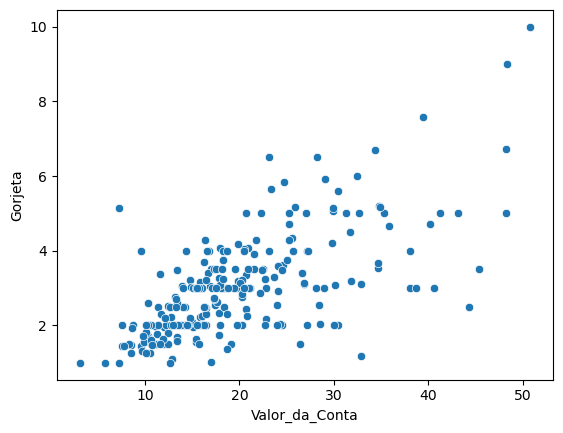

In [13]:
sns.scatterplot(x = 'Valor_da_Conta', y = 'Gorjeta', data = dados);

Visualmente, o valor da gorjeta tende a aumentar quando o valor da conta aumenta.

## Criando o campo porcentagem

In [14]:
dados['Porcentagem'] = ((dados['Gorjeta'] / dados['Valor_da_Conta']) * 100).round(2)

In [15]:
dados.head()

,Valor_da_Conta,Gorjeta,Sobremesa,Dia,Turno,Nº_Pessoas,Porcentagem
0,16.99,1.01,Não,Dom,Jantar,2,5.94
1,10.34,1.66,Não,Dom,Jantar,3,16.05
2,21.01,3.50,Não,Dom,Jantar,3,16.66
3,23.68,3.31,Não,Dom,Jantar,2,13.98
4,24.59,3.61,Não,Dom,Jantar,4,14.68


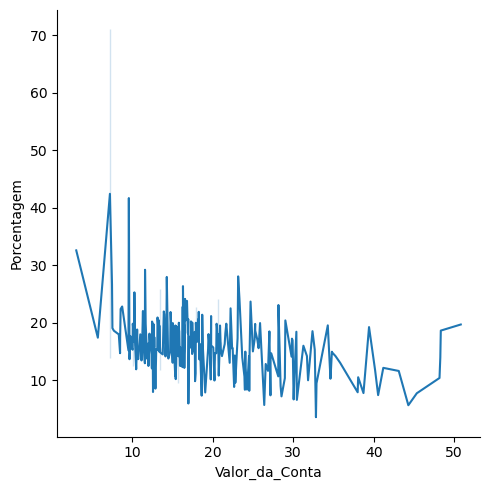

In [16]:
sns.relplot(x = 'Valor_da_Conta', y = 'Porcentagem', kind ='line', data = dados);

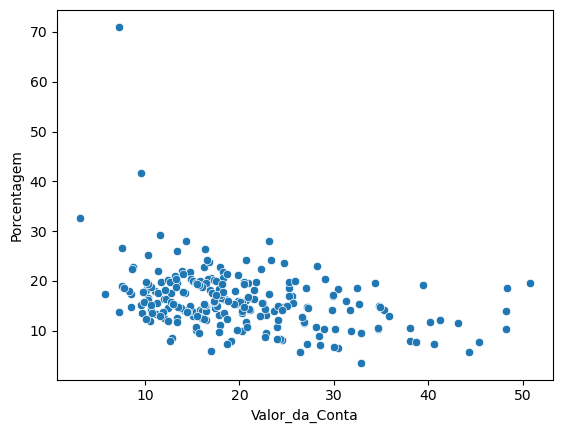

In [17]:
sns.scatterplot(x = 'Valor_da_Conta', y = 'Porcentagem', data = dados); 

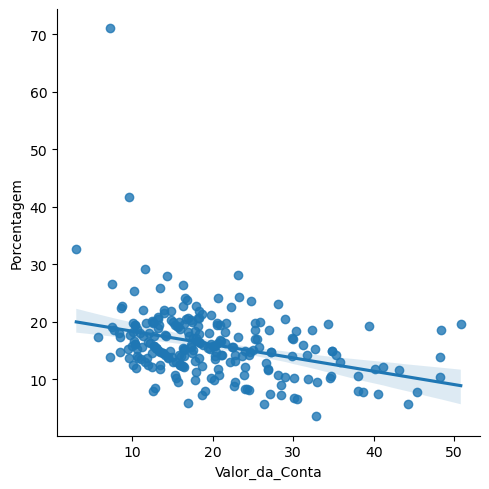

In [18]:
sns.lmplot(x = 'Valor_da_Conta', y = 'Porcentagem', data = dados);

Podemos observar que a porcentagem de gorjeta tende a diminuir quando o Valor da Conta aumenta. Além disso, também observamos que a maior porcentagem de gorjeta fica entre 10% e 20% do Valor da Conta.

In [19]:
quantidade_10_20 = dados.loc[(dados['Porcentagem'] >= 10) & (dados['Porcentagem'] <= 20)]
quantidade_10_20.shape[0]

178

In [20]:
porcentagem_10_20 = round(((quantidade_10_20.shape[0] / dados.shape[0]) * 100), 2)
print(f'Para ser mais exato, a quantidade de gorjetas que está entre 10% e 20% corresponde a {porcentagem_10_20}% do total de gorjetas')

Para ser mais exato, a quantidade de gorjetas que está entre 10% e 20% corresponde a 72.95% do total de gorjetas


# Análise 2 - Sobremesa

In [21]:
dados.loc[dados['Sobremesa'] == 'Sim'].describe()

,Valor_da_Conta,Gorjeta,Nº_Pessoas,Porcentagem
count,93.000000,93.000000,93.000000,93.000000
mean,20.756344,3.008710,2.408602,16.319140
std,9.832154,1.401468,0.810751,8.511748
min,3.070000,1.000000,1.000000,3.560000
25%,13.420000,2.000000,2.000000,10.680000
50%,17.920000,3.000000,2.000000,15.380000
75%,26.860000,3.680000,3.000000,19.510000
max,50.810000,10.000000,5.000000,71.030000


In [22]:
dados.loc[dados['Sobremesa'] == 'Não'].describe()

,Valor_da_Conta,Gorjeta,Nº_Pessoas,Porcentagem
count,151.000000,151.000000,151.000000,151.000000
mean,19.188278,2.991854,2.668874,15.932318
std,8.255582,1.377190,1.017984,3.990701
min,7.250000,1.000000,1.000000,5.680000
25%,13.325000,2.000000,2.000000,13.690000
50%,17.590000,2.740000,2.000000,15.560000
75%,22.755000,3.505000,3.000000,18.500000
max,48.330000,9.000000,6.000000,29.200000


## Gráficos

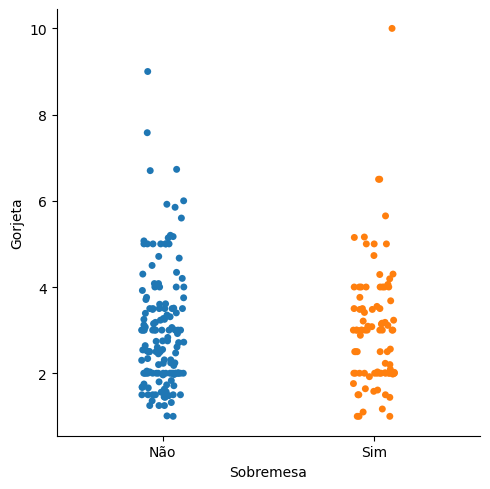

In [23]:
sns.catplot(x = 'Sobremesa', y ='Gorjeta', data = dados);

Apenas com os campos "Sobremesa" e "Gorjeta" não conseguimos tirar conclusões, visto que os valores são bastante parecidos para quem pediu sobremesa e para quem não pediu sobremesa. Vamos adicionar o campo "Valor_da_Conta" para tirar algumas conclusões.

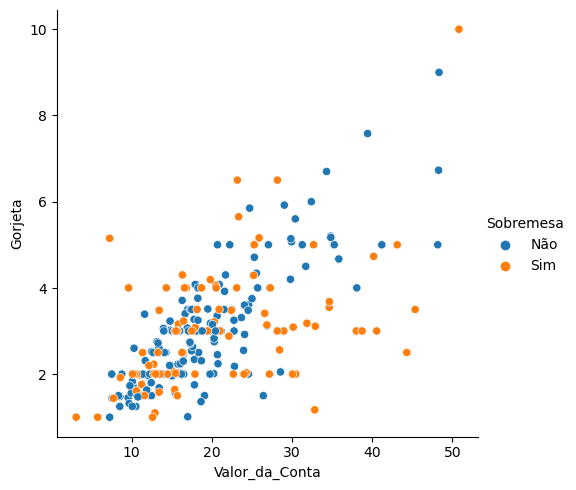

In [24]:
sns.relplot(x ='Valor_da_Conta', y = 'Gorjeta', hue = 'Sobremesa', data = dados);

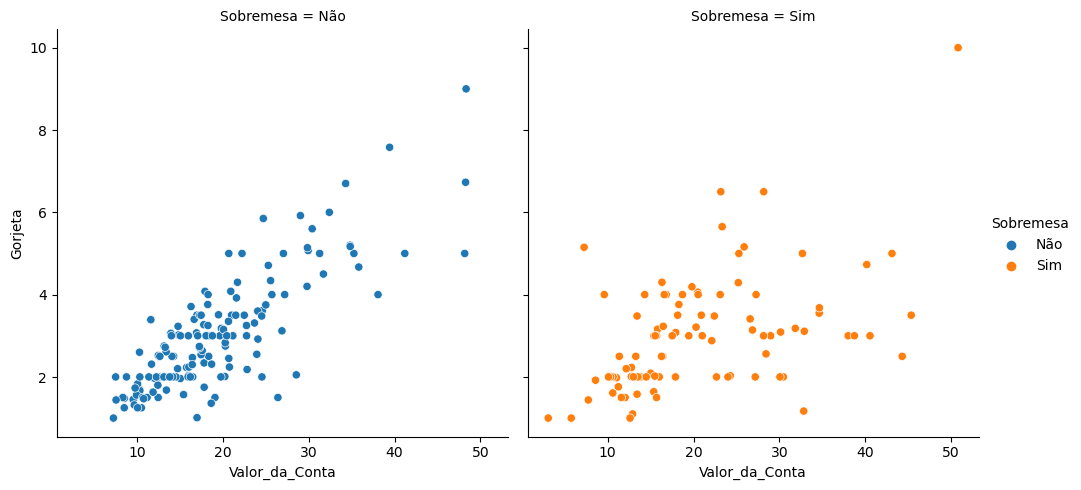

In [25]:
sns.relplot(x ='Valor_da_Conta', y = 'Gorjeta', hue = 'Sobremesa', col = 'Sobremesa', data = dados);

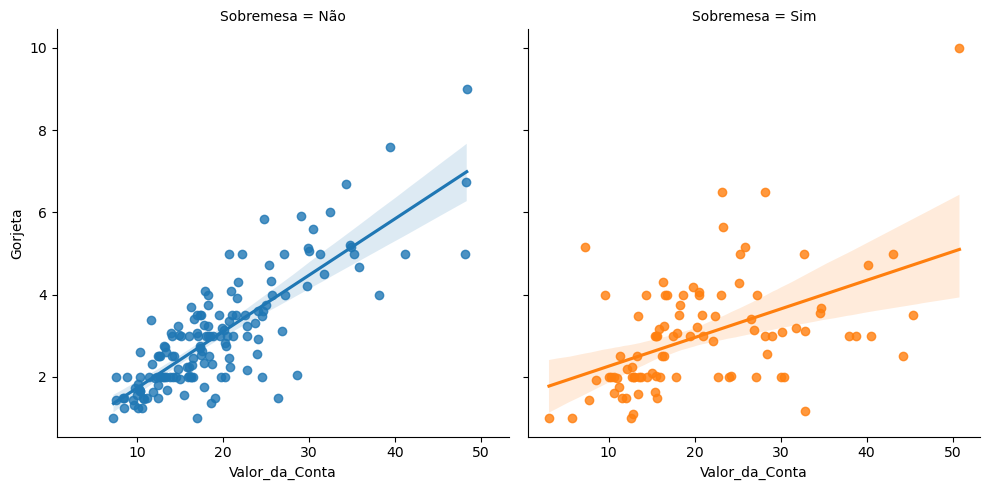

In [26]:
sns.lmplot(x ='Valor_da_Conta', y = 'Gorjeta', hue = 'Sobremesa', col = 'Sobremesa', data = dados);

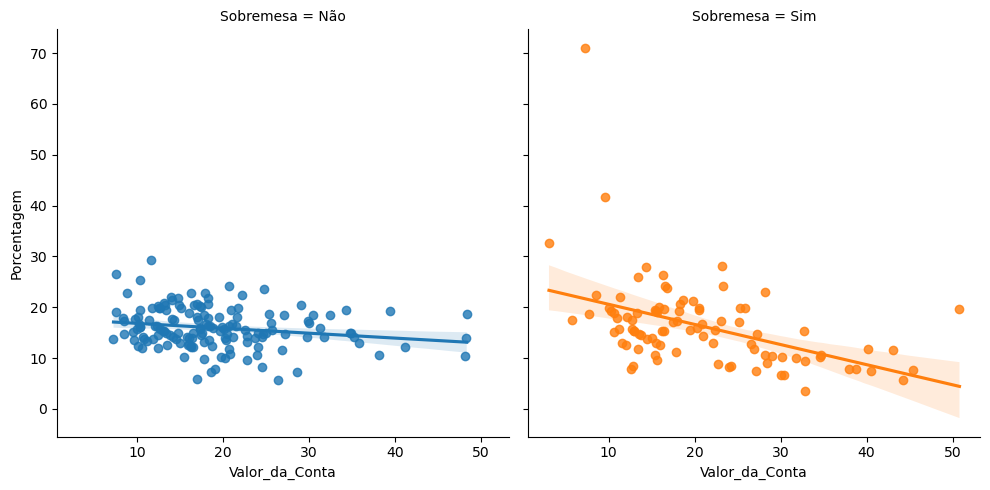

In [27]:
sns.lmplot(x ='Valor_da_Conta', y = 'Porcentagem', hue = 'Sobremesa', col = 'Sobremesa', data = dados);

Visualmente, existe uma diferença sutil da gorjeta daqueles que pediram sobremesa e daqueles que não pediram sobremesa.

## Teste de hipótese

**H<sup>null<sup>**

> **A distribuição da taxa da gorjeta é a mesma nos dois grupos**

**H<sup>alt<sup>**

> **A distribuição da taxa da gorjeta não é a mesma nos dois grupos**

In [28]:
sim_sobremesa = dados.loc[dados['Sobremesa'] == 'Sim'].Porcentagem

In [29]:
nao_sobremesa = dados.loc[dados['Sobremesa'] == 'Não'].Porcentagem

In [30]:
r = ranksums(sim_sobremesa, nao_sobremesa)

In [31]:
print(f'O valor do p-value é {r.pvalue}')

O valor do p-value é 0.558850059321255


Embora ambos os grupos tenham deixado gorjetas de valores diferentes, a diferença é insignificante do ponto de vista matemático que não se pode concluir que a população em geral apresentará um comportamento diferente.

Para aceitar a hipótese alternativa, o valor do p-value deveria ser menor ou igual a 0.005, logo vamos aceitar a hipótese nula

**H<sup>null<sup>**

> **A distribuição da taxa da gorjeta é a mesma nos dois grupos**

# Análise 3 - Dia da Semana

In [32]:
dados['Dia'].unique()

array(['Dom', 'Sab', 'Qui', 'Sex'], dtype=object)

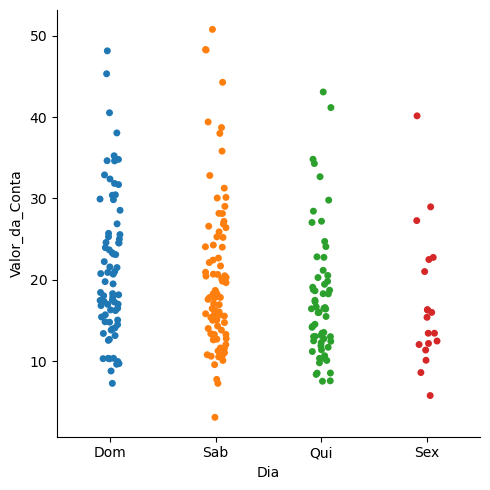

In [33]:
sns.catplot(x = 'Dia', y = 'Valor_da_Conta', data = dados);

Visualmente, na Sexta e Quinta tem menos gorjetas comparado com Sábado e Domingo.

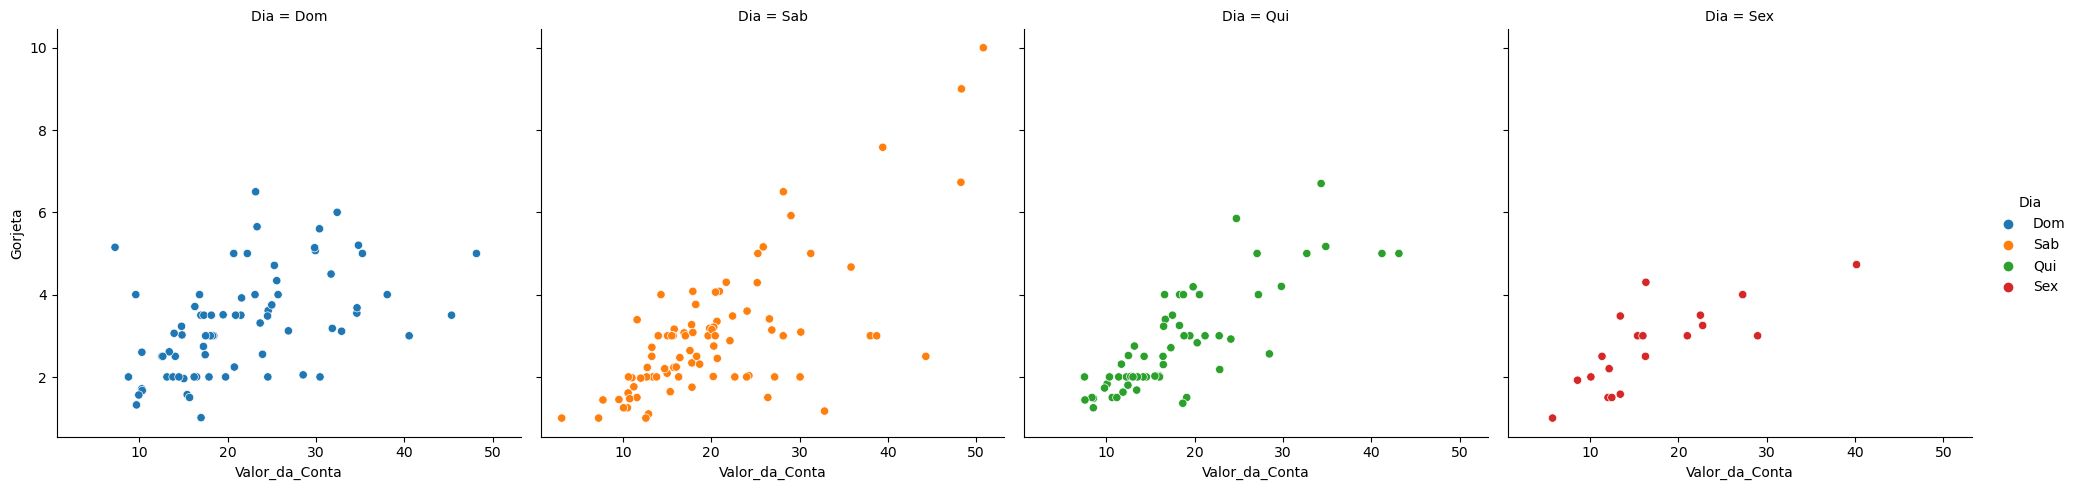

In [34]:
sns.relplot(x = 'Valor_da_Conta', y = 'Gorjeta', hue = 'Dia', col = 'Dia', data = dados);

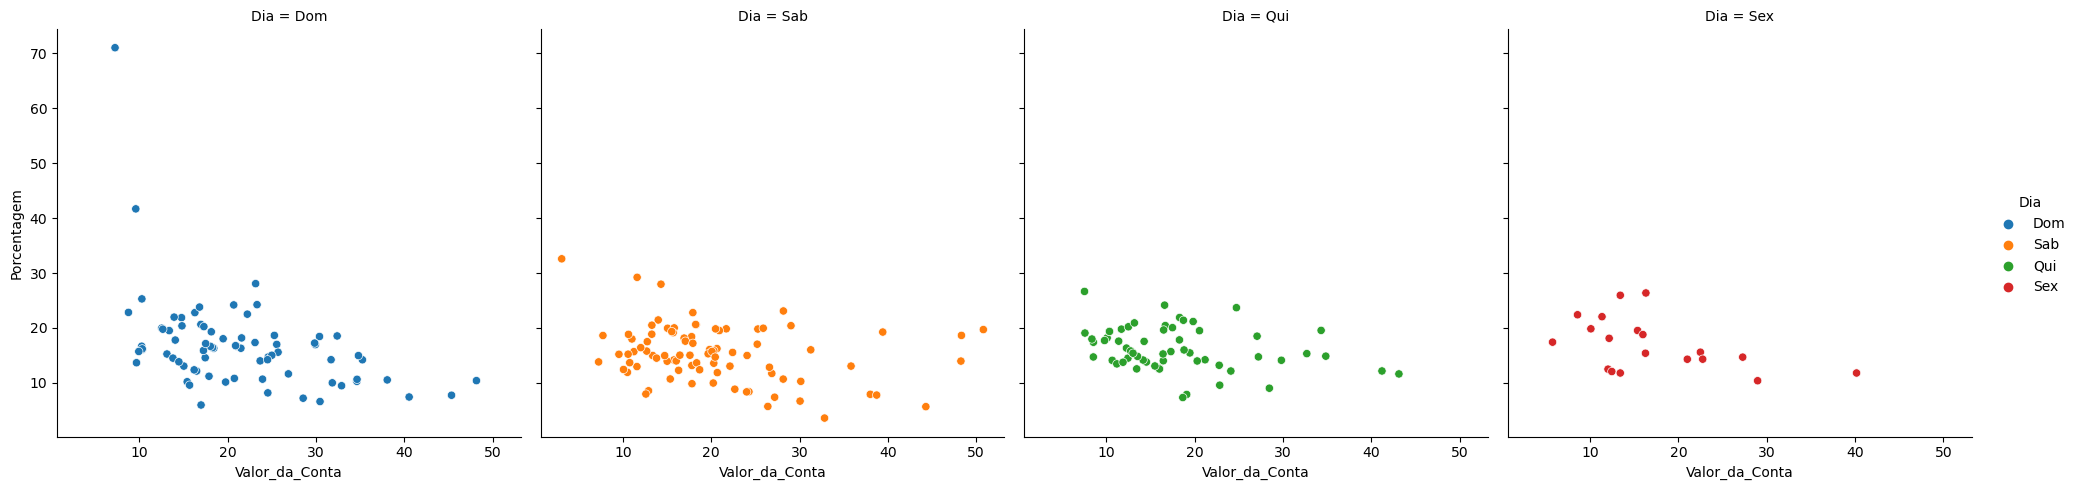

In [35]:
sns.relplot(x = 'Valor_da_Conta', y = 'Porcentagem', hue = 'Dia', col = 'Dia', data = dados);

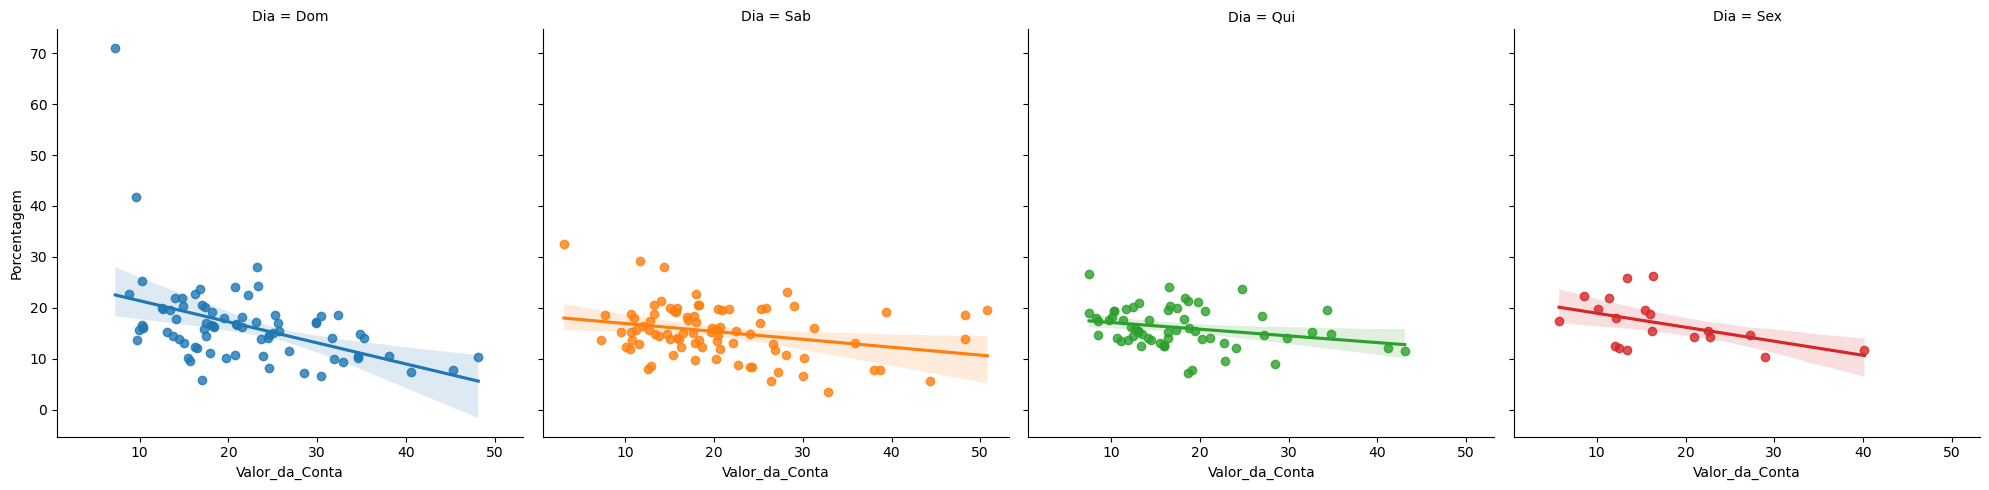

In [36]:
sns.lmplot(x = 'Valor_da_Conta', y = 'Porcentagem', hue = 'Dia', col = 'Dia', data = dados);

In [37]:
media_geral_gorjeta = round(dados['Gorjeta'].mean(), 3)
print(f'A média geral das gorjetas vale {media_geral_gorjeta}')

A média geral das gorjetas vale 2.998


In [38]:
media_dom_gorjeta = round(dados.loc[dados['Dia'] == 'Dom'].Gorjeta.mean(), 3)
print(f'A média geral das gorjetas vale {media_dom_gorjeta}')

A média geral das gorjetas vale 3.255


In [39]:
# Outra forma de fazer e mais eficaz
dados.groupby(['Dia']).mean()[['Valor_da_Conta', 'Gorjeta', 'Porcentagem']]

,Valor_da_Conta,Gorjeta,Porcentagem
Dia,,,
Dom,21.410000,3.255132,16.689605
Qui,17.682742,2.771452,16.126452
Sab,20.441379,2.993103,15.314598
Sex,17.151579,2.734737,16.991579


In [40]:
print('Frequência dos dias')
dados.Dia.value_counts()

Frequência dos dias


Sab    87
Dom    76
Qui    62
Sex    19
Name: Dia, dtype: int64

## Teste de Hipótese

**H<sup>null<sup>**

> **A distribuição do valor da conta é igual no sábado e no domingo**
    
**H<sup>alt<sup>**

> **A distribuição do valor da conta não é igual no sábado e no domingo**

In [41]:
valor_conta_domingo = dados.loc[dados['Dia'] == 'Dom'].Valor_da_Conta

In [42]:
valor_conta_sabado = dados.loc[dados['Dia'] == 'Sab'].Valor_da_Conta

In [43]:
r2 = ranksums(valor_conta_domingo, valor_conta_sabado)
print(f'O valor do p-value é {r2.pvalue}')

O valor do p-value é 0.3576728477868443


**H<sup>null<sup>**

> **A distribuição do valor da conta é igual no sábado e no domingo**

# Análise 4 - Turno do Dia

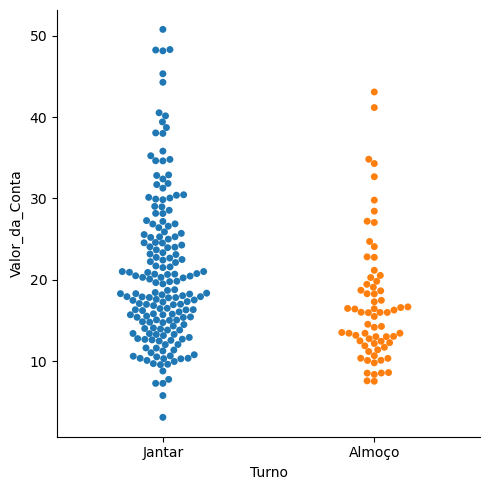

In [44]:
sns.catplot(x = 'Turno', y = 'Valor_da_Conta', kind = 'swarm', data = dados);

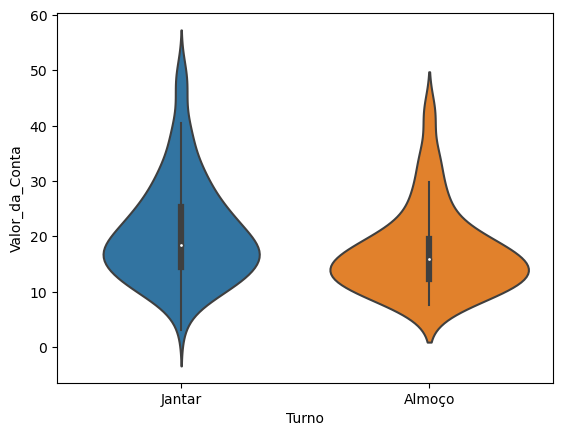

In [45]:
sns.violinplot(x = 'Turno', y = 'Valor_da_Conta', data = dados);

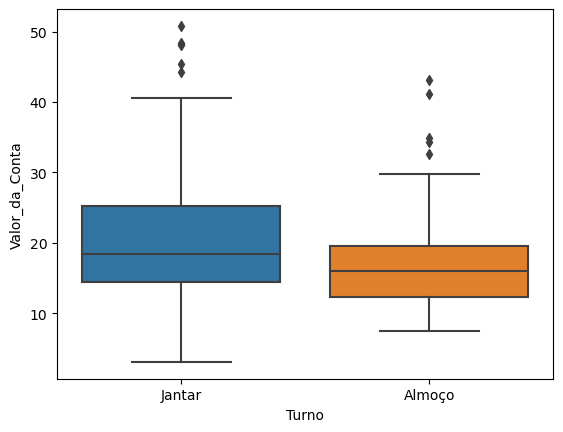

In [46]:
sns.boxplot(x = 'Turno', y = 'Valor_da_Conta', data = dados);

In [47]:
almoco = dados.query("Turno == 'Almoço'").Valor_da_Conta

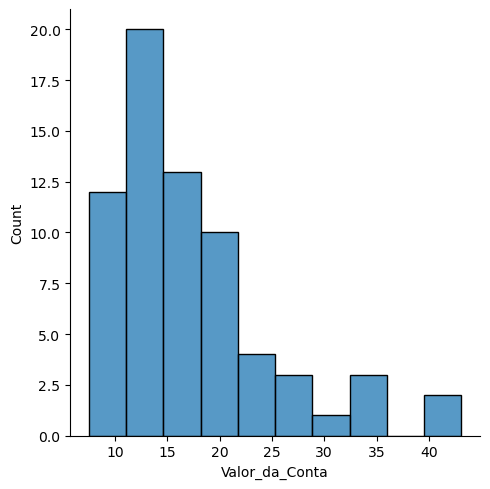

In [48]:
sns.displot(almoco);

In [49]:
jantar = dados.query("Turno == 'Jantar'").Valor_da_Conta

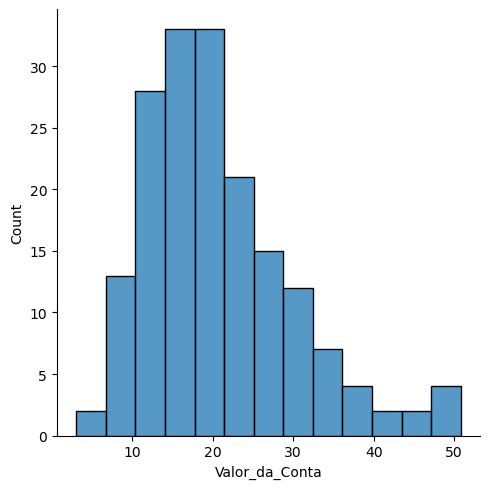

In [50]:
sns.displot(jantar);

In [51]:
dados.groupby(['Turno']).mean()[['Valor_da_Conta', 'Gorjeta', 'Porcentagem']]

,Valor_da_Conta,Gorjeta,Porcentagem
Turno,,,
Almoço,17.168676,2.728088,16.411765
Jantar,20.797159,3.102670,15.951477


## Teste de Hipótese

**H<sup>null<sup>**

> **A distribuição do valor da conta é igual no jantar e no almoço**
    
**H<sup>alt<sup>**

> **A distribuição do valor da conta não é igual no jantar e no almoço**

In [52]:
r3 = ranksums(jantar, almoco)
print(f'O valor do p-value é {r3.pvalue}')

O valor do p-value é 0.0011791039723641672


Como o p-value foi menor que 0.005, podemos aceitar a hipótese alternativa.

**H<sup>alt<sup>**

> **A distribuição do valor da conta não é igual no jantar e no almoço**

---

## Teste de Hipótese 2

**H<sup>null<sup>**

> **A distribuição da taxa da gorjeta é igual no jantar e no almoço**
    
**H<sup>alt<sup>**

> **A distribuição da taxa da gorjeta não é igual no jantar e no almoço**

In [53]:
porcentagem_almoco = dados.query("Turno == 'Almoço'").Porcentagem

In [54]:
porcentagem_jantar = dados.query("Turno == 'Jantar'").Porcentagem

In [55]:
r4 = ranksums(porcentagem_almoco, porcentagem_jantar)
print(f'O valor do p-value é {r4.pvalue}')

O valor do p-value é 0.22831951519679017


**H<sup>null<sup>**

> **A distribuição da taxa da gorjeta é igual no jantar e no almoço**